#EXERCISE 6.1

###Simulation of the 1D Ising model

I modified the provided code by completing methods for the computation of:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

simulations were run separately for $U, C, \chi$, and for $M$. I used 20 blocks for 10000 throws.

Given that the system is prepared at an initial random configuration, time must pass before the system evolves to the equilibrium configuration for the given simulation temperature. In order to get an indication of the number of Metropolis steps necessary for the system to reach this equilibrium state, I started a simulation at T = 1.0 and let it evolve for 10000 steps, looking for the approximate number of steps after which the evaluated internal energy per spin converged to the theoretical one:

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

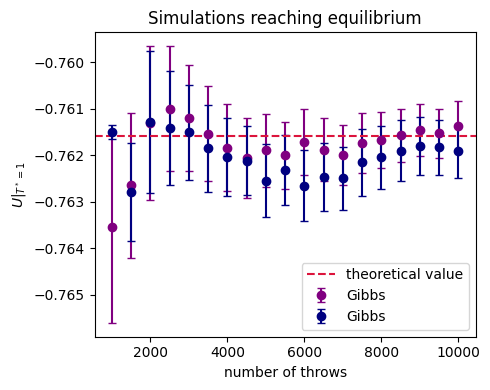

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

path = "NSL_SIMULATOR/OUTPUT"

data_eq_gibbs = pd.read_csv(path + "total_energy_equilibrium3.000000.dat", comment='#', delim_whitespace=True)
data_eq_gibbs.columns = ['block', 'actual E', 'E ave', 'error']
data_eq_MRT = pd.read_csv(path + "total_energy_equilibrium2.000000.dat", comment='#', delim_whitespace=True)
data_eq_MRT.columns = ['block', 'actual E', 'E ave', 'error']

T = 1.0
th_1 = np.tanh(J/T)
thN_1 = th_1**50
ch_1 = 1/th_1
e = -1*(th_1 + ch_1*thN_1)/(1 + thN_1)

fig, ax = plt.subplots(1,1, figsize = (5,4))

ax.errorbar(data_eq_gibbs['block']*500 ,data_eq_gibbs['E ave'], yerr=data_eq_gibbs['error'], fmt='o', capsize=3, color = 'purple', label = 'Gibbs')
ax.errorbar(data_eq_MRT['block']*500 ,data_eq_MRT['E ave'], yerr=data_eq_MRT['error'], fmt='o', capsize=3, color = 'navy', label = 'MC')
ax.axhline(e, linestyle = '--', color = 'crimson', label = 'theoretical value')
ax.set(xlabel = 'number of throws', ylabel = "$U|_{T^* = 1}$", title = 'Simulations reaching equilibrium')
ax.legend()

plt.tight_layout()
plt.show()
plt.close()

We can see that it takes roughly 4 blocks (of 500 steps each) to appreciate the convergence. I therefore assumed an equilibration time of 3000 steps in my algorithm.

In order to get the temperature dependence, my code runs 15 different simulation, for each temperature from 0.5 to 2.0 in 0.1 increments, computing averages for 20 blocks of 500 measures each. The last block's cumulative value of the targeted variables is then saved, with its error, for every temperature

In [ ]:
data_gibbs = pd.read_csv(path + "data_vs_temperature_gibbs.dat", delim_whitespace=True)
data_MRT2 = pd.read_csv(path + "data_vs_temperature_MRT2.dat", delim_whitespace=True)
T = data_gibbs['T']
data_MRT2

,T,energy,energy_error,cv,cv_error,suscept,suscept_error,magn,magn_error
0,0.5,-0.973482,0.001118,0.330572,0.009226,78.42100,1.035440,0.880050,0.015534
1,0.6,-0.934482,0.001180,0.423266,0.005720,43.98190,0.893484,0.648330,0.024098
2,0.7,-0.892423,0.000916,0.431783,0.003530,24.41460,0.409115,0.461066,0.011612
3,0.8,-0.849208,0.000719,0.448101,0.003164,15.47980,0.182338,0.284571,0.010987
4,0.9,-0.804704,0.000563,0.437990,0.003565,10.33360,0.134651,0.197161,0.007249
5,1.0,-0.761934,0.000558,0.419090,0.002468,7.47212,0.064347,0.141217,0.003301
6,1.1,-0.720700,0.000526,0.395755,0.001895,5.60451,0.054813,0.111791,0.004871
7,1.2,-0.682733,0.000429,0.366742,0.001633,4.42034,0.035043,0.082614,0.002486
8,1.3,-0.646500,0.000401,0.344588,0.001202,3.55720,0.025672,0.070806,0.001997
9,1.4,-0.612811,0.000433,0.315716,0.001052,2.93371,0.018326,0.058674,0.001884


These values can then be compared with the theoretical temperature dependence:

In [ ]:
points=100
T_points = np.linspace(0.2,2.3,num=points)
J = 1.0
Ns = 50
beta = 1/T_points
th = np.tanh(J/T_points)
thN= th**Ns
ch = 1/th

def theo_energy():
  return -J*( th + ch*thN )/( 1 + thN )

def theo_heat():
  return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

def theo_magn(h = 0.02):
  l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
  l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
  Z = l1**Ns + l2**Ns
  return (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))
          + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

def theo_susc():
  return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

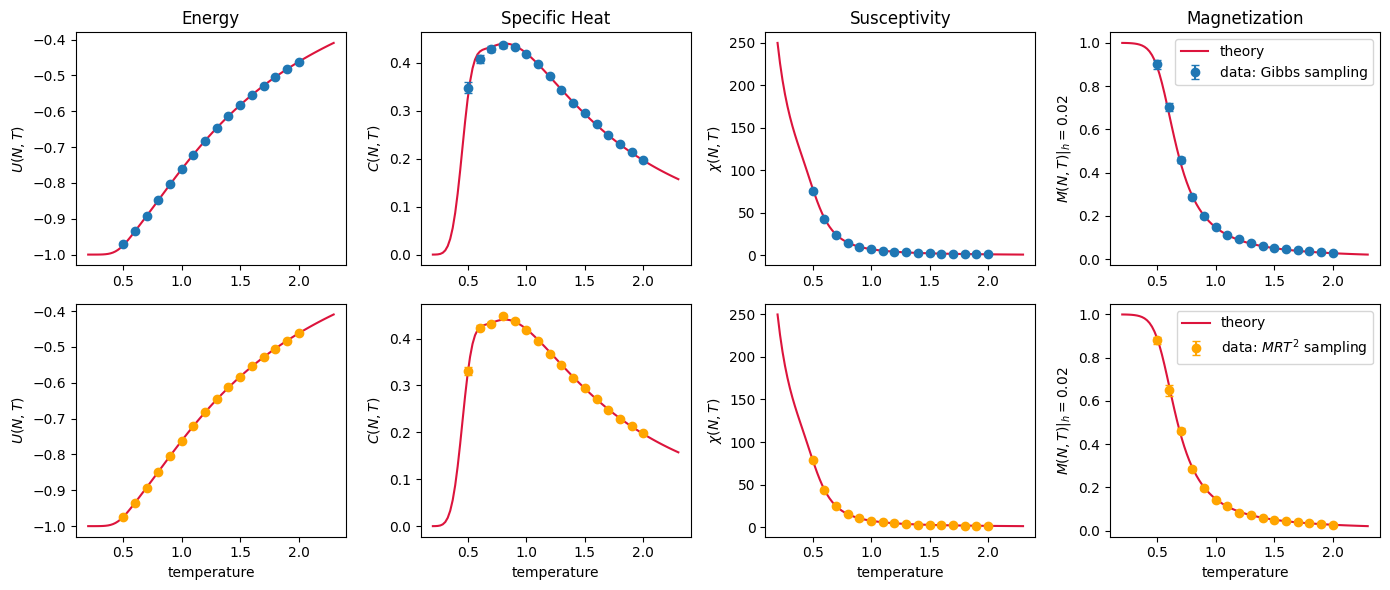

In [ ]:
e = theo_energy()
C= theo_heat()
X = theo_susc()
M = theo_magn()

fig, ax = plt.subplots(2, 4, figsize = (14, 6))



ax[0][0].plot(T_points, e, color = 'crimson', label = 'theory')
ax[0][0].errorbar(T, data_gibbs['energy'], yerr=data_gibbs['energy_error'], fmt='o', capsize=3, label='data')
ax[0][1].plot(T_points, C, color = 'crimson', label = 'theory')
ax[0][1].errorbar(T, data_gibbs['cv'], yerr=data_gibbs['cv_error'], fmt='o', capsize=3, label='data')
ax[0][2].plot(T_points, X, color = 'crimson', label = 'theory')
ax[0][2].errorbar(T, data_gibbs['suscept'], yerr=data_gibbs['suscept_error'], fmt='o', capsize=3, label='data')
ax[0][3].plot(T_points, M, color = 'crimson', label = 'theory')
ax[0][3].errorbar(T, data_gibbs['magn'], yerr=data_gibbs['magn_error'], fmt='o', capsize=3, label='data: Gibbs sampling')

ax[0][0].set(ylabel=r'$U(N, T)$', title = 'Energy')
ax[0][1].set(ylabel=r'$C(N, T)$', title = 'Specific Heat')
ax[0][2].set(ylabel=r'$\chi (N, T)$', title = 'Susceptivity')
ax[0][3].set(ylabel=r'$M(N, T)|_h=0.02$', title = 'Magnetization')

ax[1][0].plot(T_points, e, color = 'crimson', label = 'theory')
ax[1][0].errorbar(T, data_MRT2['energy'], yerr=data_MRT2['energy_error'], color = 'orange', fmt='o', capsize=3, label='data')
ax[1][1].plot(T_points, C, color = 'crimson', label = 'theory')
ax[1][1].errorbar(T, data_MRT2['cv'], yerr=data_MRT2['cv_error'], color = 'orange', fmt='o', capsize=3, label='data')
ax[1][2].plot(T_points, X, color = 'crimson', label = 'theory')
ax[1][2].errorbar(T, data_MRT2['suscept'], yerr=data_MRT2['suscept_error'], color = 'orange', fmt='o', capsize=3, label='data')
ax[1][3].plot(T_points, M, color = 'crimson', label = 'theory')
ax[1][3].errorbar(T, data_MRT2['magn'], yerr=data_MRT2['magn_error'], color = 'orange', fmt='o', capsize=3, label=r'data: ${MRT}^2$ sampling')

ax[1][0].set(xlabel='temperature', ylabel=r'$U(N, T)$')
ax[1][1].set(xlabel='temperature', ylabel=r'$C(N, T)$')
ax[1][2].set(xlabel='temperature', ylabel=r'$\chi (N, T)$')
ax[1][3].set(xlabel='temperature', ylabel=r'$M(N, T)|_h=0.02$')

ax[0][0].legend()
ax[1][0].legend()

plt.tight_layout()
plt.show()
plt.close()

We can see that the values obtained from the simulations closely follow the expected values, with the same precision between the two simulation types!